In [5]:
import tensorflow as tf
import keras
from keras.utils import plot_model
import numpy as np
from keras import layers
from sklearn.model_selection import GridSearchCV
from typing import Tuple
# Load the data and label
def load_data(filename: str) -> Tuple[np.ndarray, np.ndarray]:
    data = np.load(f'{filename}')
    return data['data'], data['labels']



# Load the data and labels
train_data, train_labels = load_data('train_data_SYN.npz')
test_data, test_labels = load_data('test_data_SYN.npz')

Training model 1
Epoch 1/10
157/157 [==============================] - 1s 2ms/step - loss: 1.2954 - accuracy: 0.5794
Epoch 2/10
157/157 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.8544
Epoch 3/10
157/157 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.8970
Epoch 4/10
157/157 [==============================] - 0s 1ms/step - loss: 0.2646 - accuracy: 0.9214
Epoch 5/10
157/157 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.9392
Epoch 6/10
157/157 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.9516
Epoch 7/10
157/157 [==============================] - 0s 2ms/step - loss: 0.1496 - accuracy: 0.9644
Epoch 8/10
157/157 [==============================] - 0s 2ms/step - loss: 0.1256 - accuracy: 0.9706
Epoch 9/10
157/157 [==============================] - 0s 2ms/step - loss: 0.1081 - accuracy: 0.9800
Epoch 10/10
157/157 [==============================] - 0s 1ms/step - loss: 0.4819 -

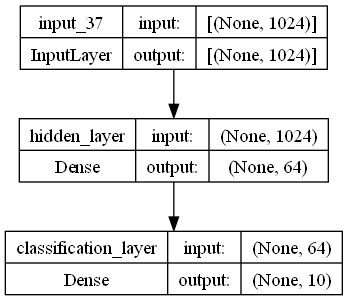

In [8]:
# Define the hyperparameters for each model
models = [
    {'reg_l1_param': 10e-6, 'hidden_size': 16},
    {'reg_l1_param': 10e-5, 'hidden_size': 32},
    {'reg_l1_param': 10e-4, 'hidden_size': 64}
]

# Train and evaluate each model
for i, model_params in enumerate(models):
    print('Training model', i+1)
    input_tensor = tf.keras.Input(shape=(1024,))
    hidden_layer_1 = layers.Dense(
        units=model_params['hidden_size'],
        activation=tf.nn.relu,
        name='hidden_layer',
        activity_regularizer=tf.keras.regularizers.l1(model_params['reg_l1_param'])
    )(input_tensor)
    output_layer = layers.Dense(units=10, activation=tf.nn.softmax, name='classification_layer')(hidden_layer_1)
    model = keras.models.Model(inputs=input_tensor, outputs=output_layer)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_data, train_labels, epochs=10, batch_size=32)
    test_loss, test_acc = model.evaluate(test_data, test_labels)
    print('Test accuracy for model', i+1, ':', test_acc)

# Plot the model architecture
plot_model(model, to_file='model.png', show_shapes=True)